In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import pickle

In [2]:
df_classdata = pd.read_csv('/content/classData.csv')

print("First 5 rows of Fault Type Classification Dataset:")
print(df_classdata.head())

First 5 rows of Fault Type Classification Dataset:
   G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   

         Vc  
0 -0.267815  
1 -0.189099  
2 -0.151428  
3 -0.130570  
4 -0.113983  


In [3]:
print(df_classdata.describe())

                 G            C            B            A           Ia  \
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000   
mean      0.432006     0.411271     0.555527     0.571429    13.721194   
std       0.495387     0.492095     0.496939     0.494903   464.741671   
min       0.000000     0.000000     0.000000     0.000000  -883.542316   
25%       0.000000     0.000000     0.000000     0.000000  -119.802518   
50%       0.000000     0.000000     1.000000     1.000000     2.042805   
75%       1.000000     1.000000     1.000000     1.000000   227.246377   
max       1.000000     1.000000     1.000000     1.000000   885.738571   

                Ib           Ic           Va           Vb           Vc  
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000  
mean    -44.845268    34.392394    -0.007667     0.001152     0.006515  
std     439.269195   371.107412     0.289150     0.313437     0.307897  
min    -900.526951  -883.357762    -0.620

In [4]:
print(df_classdata.isnull().sum())

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64


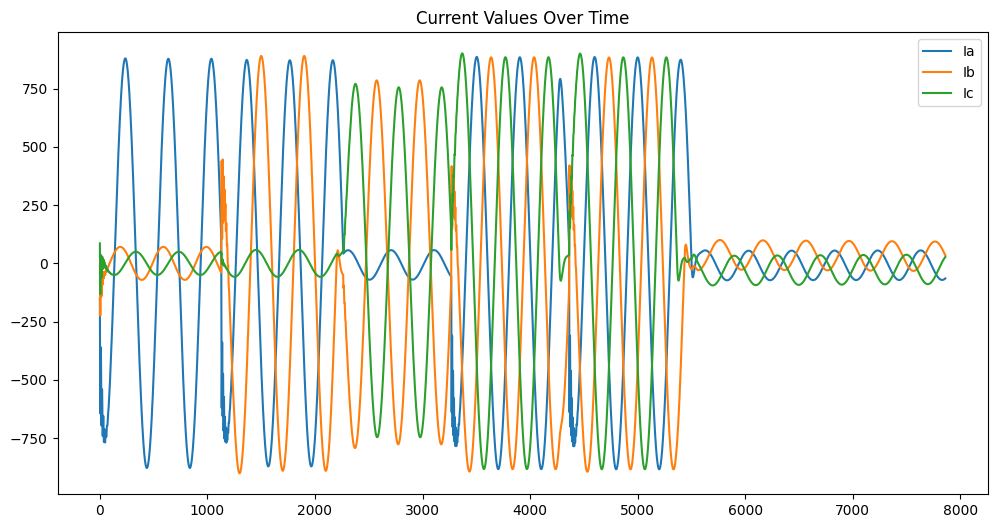

In [5]:
# Plot time series of selected variables
plt.figure(figsize=(12,6))
plt.plot(df_classdata['Ia'], label='Ia')
plt.plot(df_classdata['Ib'], label='Ib')
plt.plot(df_classdata['Ic'], label='Ic')
plt.legend()
plt.title('Current Values Over Time')
plt.show()

In [6]:
print(df_classdata['G'].unique())
print(df_classdata['A'].unique())
print(df_classdata['B'].unique())
print(df_classdata['C'].unique())

[1 0]
[1 0]
[0 1]
[0 1]


In [7]:
def classify_fault(row):
    if row['G'] == 0 and row['C'] == 0 and row['B'] == 0 and row['A'] == 0:
        return 'No Fault'
    elif row['G'] == 1 and row['C'] == 0 and row['B'] == 0 and row['A'] == 1:
        return 'LG Fault'
    elif row['G'] == 0 and row['C'] == 0 and row['B'] == 1 and row['A'] == 1:
        return 'LL Fault'
    elif row['G'] == 0 and row['C'] == 1 and row['B'] == 1 and row['A'] == 0:
        return 'LL Fault'
    elif row['G'] == 1 and row['C'] == 0 and row['B'] == 1 and row['A'] == 1:
        return 'LLG Fault'
    elif row['G'] == 0 and row['C'] == 1 and row['B'] == 1 and row['A'] == 1:
        return 'LLL Fault'
    elif row['G'] == 1 and row['C'] == 1 and row['B'] == 1 and row['A'] == 1:
        return 'LLLG Fault'
    else:
        return 'Other'

# Apply function
df_classdata['Fault Type'] = df_classdata.apply(classify_fault, axis=1)

df_classdata.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,LG Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,LG Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,LG Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,LG Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,LG Fault


In [8]:
df_classdata.drop(columns=['G', 'A', 'B', 'C'], inplace=True)

In [9]:
df_classdata.head()

,Ia,Ib,Ic,Va,Vb,Vc,Fault Type
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,LG Fault
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,LG Fault
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,LG Fault
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,LG Fault
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,LG Fault


In [10]:
print(df_classdata['Fault Type'].unique())

['LG Fault' 'LLG Fault' 'LL Fault' 'LLL Fault' 'LLLG Fault' 'No Fault']


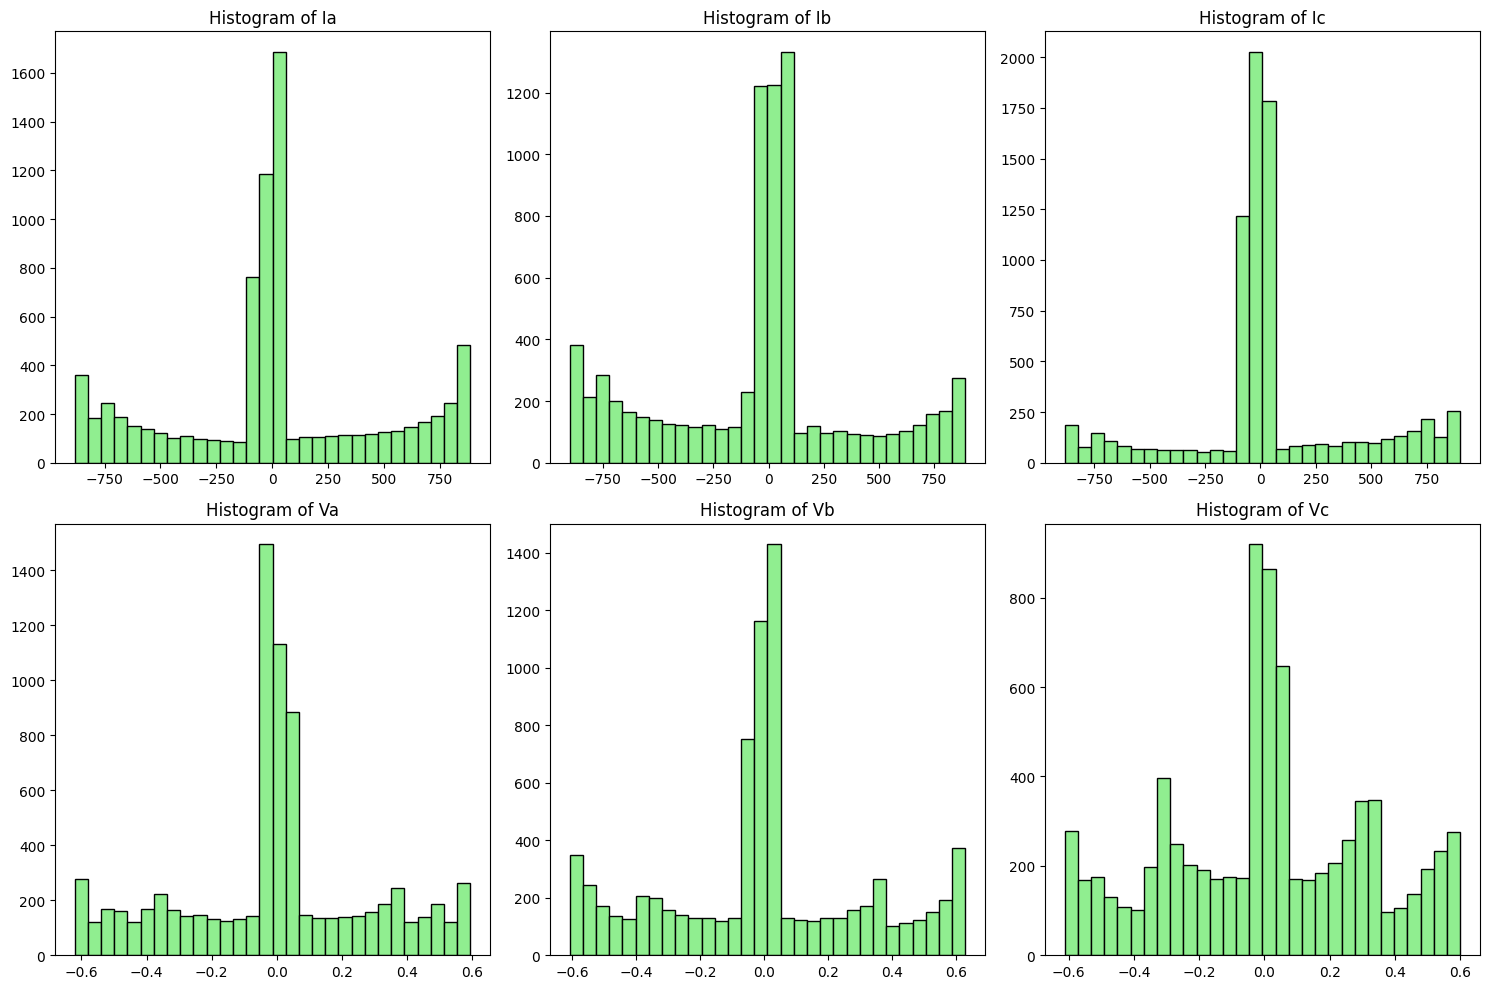

In [11]:

ip_cols = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

plt.figure(figsize=(15, 10))
for i, col in enumerate(ip_cols):
    plt.subplot(2, 3, i+1)
    plt.hist(df_classdata[col], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

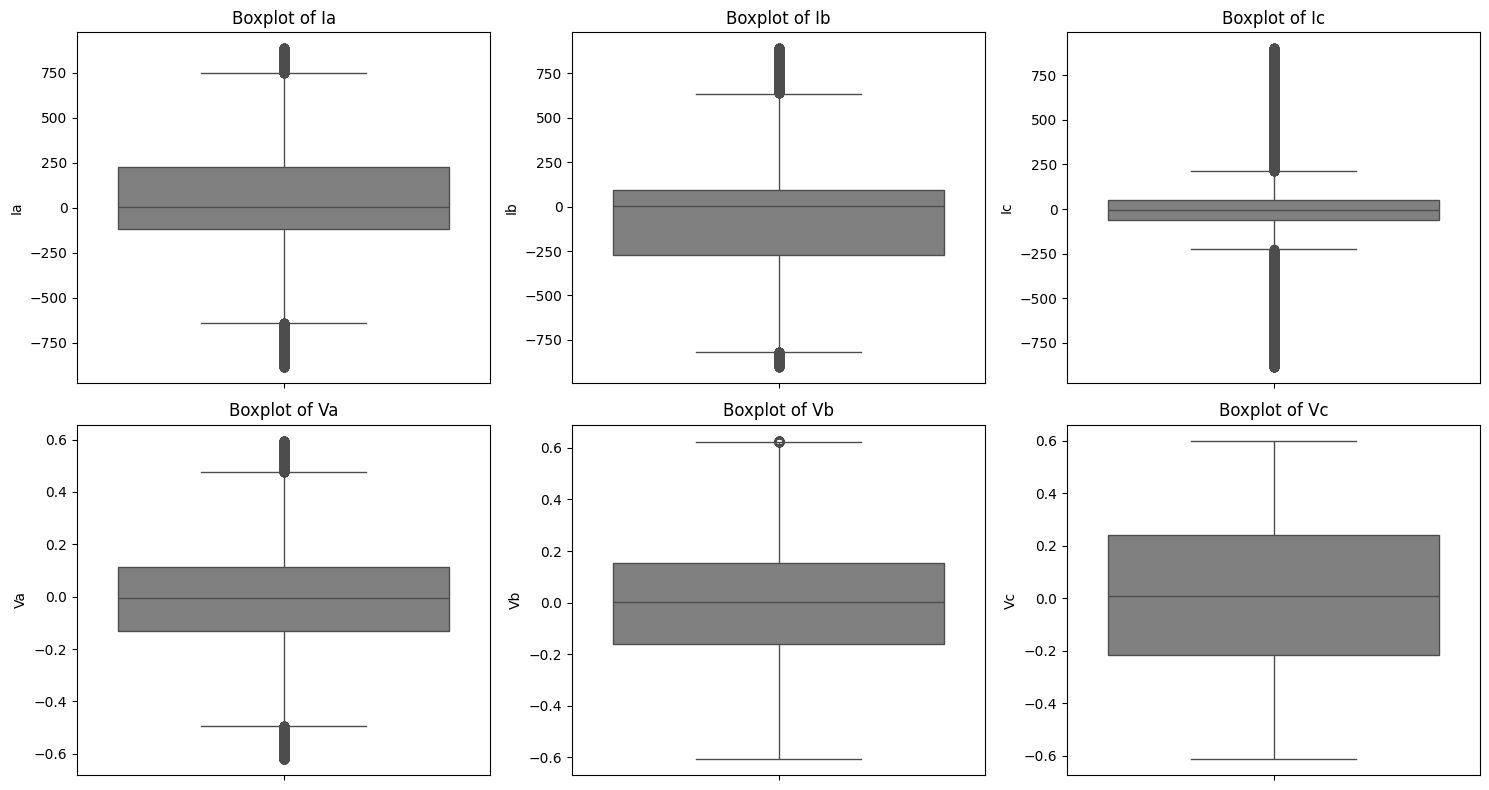

In [12]:

plt.figure(figsize=(15, 8))
for i, col in enumerate(ip_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_classdata[col], color='gray')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<ipython-input-13-852fca8af168>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_classdata, x='Fault Type', palette='Set3', order = df_classdata['Fault Type'].value_counts().index)


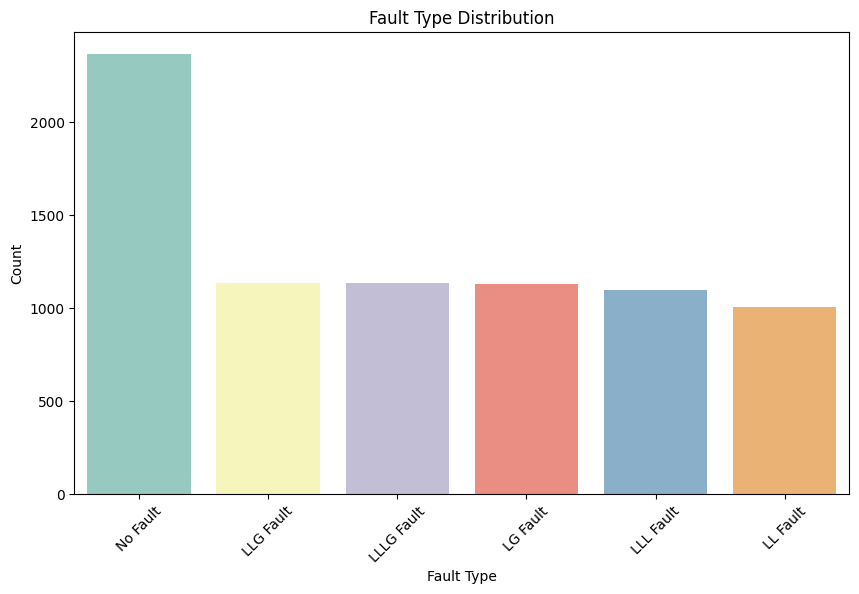

In [13]:


plt.figure(figsize=(10, 6))
sns.countplot(data=df_classdata, x='Fault Type', palette='Set3', order = df_classdata['Fault Type'].value_counts().index)
plt.title('Fault Type Distribution')
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Splitting the data into train and test data


In [14]:
df = df_classdata.copy()

X = df.drop(columns=['Fault Type'])
y = df['Fault Type']
le = LabelEncoder()
y_labelencoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_labelencoded, test_size=0.3, random_state=42, stratify=y_labelencoded)

###SVM pipeline

In [15]:

svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='rbf'))])

param_grid = {'svm__C':  [1,10,100], 'svm__gamma': ['scale','auto',0.1]}

grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("Training SVM...")
grid_search.fit(X_train, y_train)


best_svm = grid_search.best_estimator_
print(best_svm)
print("Best Parameters:", grid_search.best_params_)
y_pred = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)

Training SVM...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=100))])
Best Parameters: {'svm__C': 100, 'svm__gamma': 'scale'}


###Random_Forest_Pipeline

In [16]:
from sklearn.ensemble import RandomForestClassifier



rf_pipeline = Pipeline([('rf', RandomForestClassifier(random_state=42))])

param_grid = {
    'rf__n_estimators': [200,300],
    'rf__max_depth': [None,10,20],
    'rf__min_samples_split': [2,5],
    'rf__class_weight': ['balanced',None]
}

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

print("Training Random Forest...")
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(best_rf)
print("Best Parameters:", grid_search.best_params_)
y_pred = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)

Training Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])
Best Parameters: {'rf__class_weight': 'balanced', 'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


###XGBoost_Pipeline

In [17]:

import xgboost as xgb


xgb_pipeline = Pipeline([('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))])


param_grid = {
    'xgb__n_estimators': [200,300],
    'xgb__max_depth': [6,9],
    'xgb__learning_rate': [0.01,0.1],
    'xgb__subsample': [1.0],
    'xgb__colsample_bytree': [0.6,1.0],
    'xgb__gamma': [0.2]
}

grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)


print("Training XGBoost...")
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
print(best_xgb)
print("Best Parameters:", grid_search.best_params_)
y_pred = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)

Training XGBoost...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:49:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, 

###MLP_CLassifier_Pipeline

In [18]:

from sklearn.neural_network import MLPClassifier



mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42,
                         early_stopping=True,
                         validation_fraction=0.1))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(100,),(100,50)],
    'mlp__activation': ['tanh','relu'],
    'mlp__alpha': [0.0001],
    'mlp__learning_rate_init': [0.001,0.01],
    'mlp__batch_size': [64]
}

grid_search = GridSearchCV(
    mlp_pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

print("Training MLP...")
grid_search.fit(X_train, y_train)

best_mlp = grid_search.best_estimator_
print(best_mlp)
print("Best Parameters:", grid_search.best_params_)
y_pred = best_mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred)

Training MLP...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(activation='tanh', batch_size=64,
                               early_stopping=True,
                               hidden_layer_sizes=(100, 50),
                               learning_rate_init=0.01, random_state=42))])
Best Parameters: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__batch_size': 64, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__learning_rate_init': 0.01}


###Classification_Report_of_models

In [19]:
a = [best_xgb, best_mlp, best_rf, best_svm];

for i in a:
  y_pred = i.predict(X_test)
  print('The classification report of ', i)
  print(classification_report(y_test, y_pred, target_names = le.classes_))
  print('------------------------------------------------------------------------------------------')



The classification report of  Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                   

###Confusion_matrix


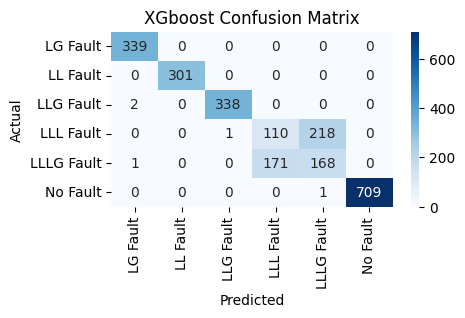

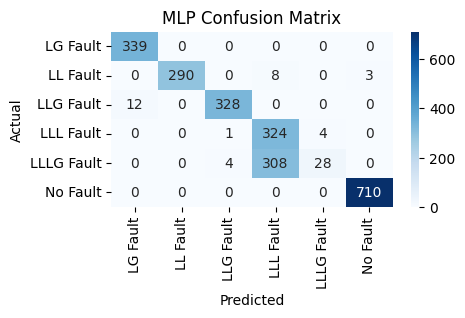

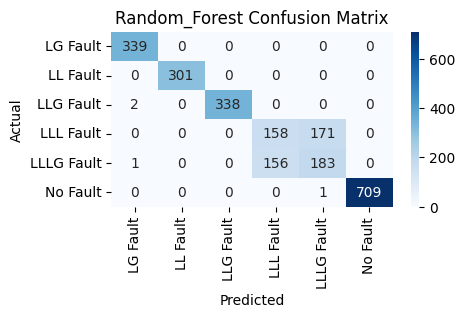

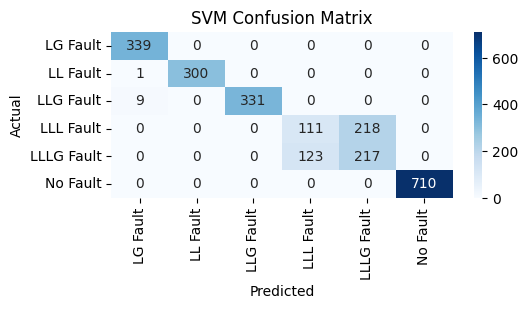

In [20]:
a = [best_xgb, best_mlp, best_rf, best_svm];
b = ['XGboost', 'MLP', 'Random_Forest', 'SVM'];
for j in range(1,5):
  i = a[j-1];
  name = b[j-1];
  y_pred = i.predict(X_test)
  plt.figure(figsize=(10, 5))
  plt.subplot(2, 2, j)
  c_matrix = confusion_matrix(y_test,y_pred)
  sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
  plt.title(f'{name} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
plt.tight_layout()
plt.show()

###Comparing_accuracy_scores

<ipython-input-21-540e9d3df287>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracy_scores, palette="viridis", saturation=0.8)


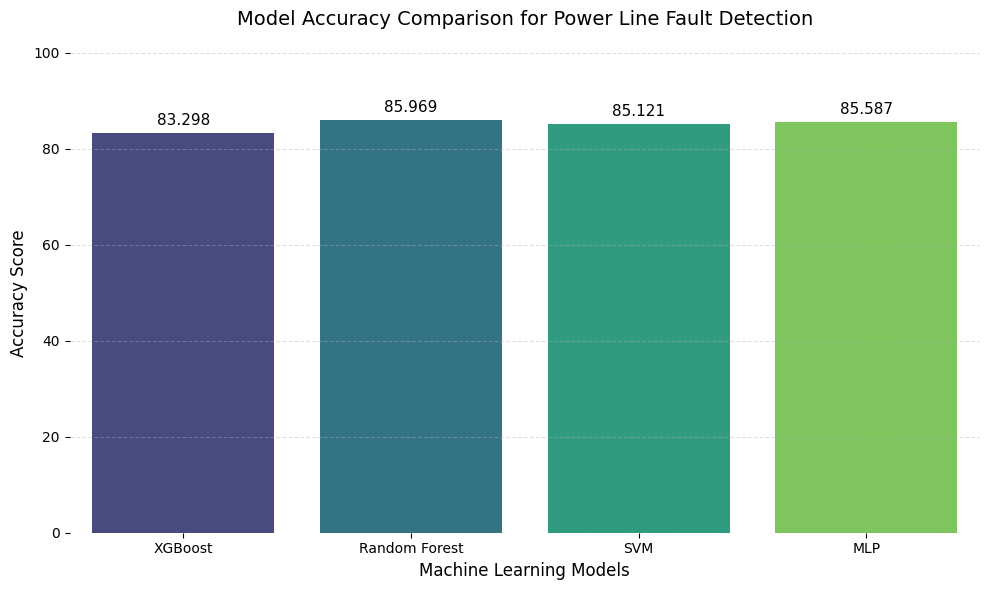

In [21]:


models = ['XGBoost', 'Random Forest', 'SVM', 'MLP']
accuracy_scores = [accuracy_xgb*100, accuracy_rf*100, accuracy_svm*100, accuracy_mlp*100]


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=models, y=accuracy_scores, palette="viridis", saturation=0.8)


plt.title('Model Accuracy Comparison for Power Line Fault Detection', fontsize=14, pad=20)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0.0, 100.0)




ax.yaxis.grid(True, linestyle='--', alpha=0.4)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=11)

sns.despine(left=True, bottom=True)


plt.tight_layout()

plt.show()

In [22]:
pkl_file = "Transmission_line_fault_prediction_model.pkl"

with open(pkl_file, 'wb') as file:
    pickle.dump(best_rf, file)

In [23]:
with open(pkl_file, 'rb') as file:
    model = pickle.load(file)

y_predict = model.predict(X_test)
y_pred = le.inverse_transform(y_predict)
y_pred

array(['LL Fault', 'LLG Fault', 'No Fault', ..., 'LL Fault', 'LG Fault',
       'LG Fault'], dtype=object)